# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [9]:
import numpy as np
import numba as nb

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D # Used implictely when doing 3D plots
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy import optimize

# Import your own code

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
from specialization import HouseholdSpecializationModelClass

# Question 1

In [11]:
model=HouseholdSpecializationModelClass()

In [12]:
alpha_values=[0.25,0.5,0.75]
sigma_values=[0.5,1.0,1.5]
rel = np.nan + np.zeros((3, 3))
for i_a, alpha in enumerate(alpha_values):
    for i_s, sigma in enumerate(sigma_values):
        idx=(i_a,i_s)
        model.par.alpha = alpha
        model.par.sigma=sigma
        res=model.solve_discrete()
        rel[idx]=res.HF/res.HM
        
        

In [16]:
print(rel)

[[0.54545455 0.30769231 0.21428571]
 [1.         1.         1.        ]
 [1.83333333 3.25       4.66666667]]


In [13]:
alpha_mesh, sigma_mesh = np.meshgrid(alpha_values, sigma_values, indexing='ij')

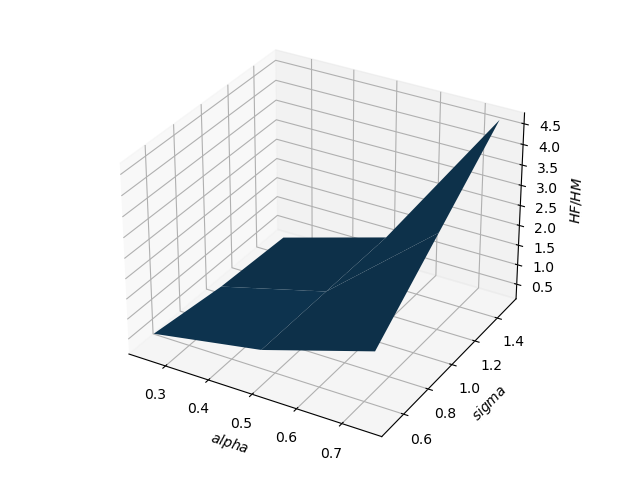

In [15]:
%matplotlib widget
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.plot_surface(alpha_mesh, sigma_mesh, rel)
ax.set_xlabel('$alpha$')
ax.set_ylabel('$sigma$')
ax.set_zlabel('$HF/HM$')
# note: fig.add_subplot(a,b,c) creates the c'th subplot in a grid of a times b plots
fig.tight_layout()

## Question 2

In [ ]:
model.par.alpha=0.5
model.par.sigma=1
model.par.wM=1

model.solve_wF_vec(discrete=True)
log_wF_vec=np.log(model.par.wF_vec)
log_HFHM=np.log(model.sol.HF_vec/model.sol.HM_vec)

In [ ]:
%matplotlib inline
fig=plt.figure()
ax= fig.add_subplot(1,1,1)
ax.plot(log_wF_vec,log_HFHM)
ax.set_xlabel('log(wF/wM)')
ax.set_ylabel('log(HF/HM)')


## Question 3

In [ ]:
model.solve_wF_vec()

In [ ]:
log_wF_vec=np.log(model.par.wF_vec)
log_HFHM=np.log(model.sol.HF_vec/model.sol.HM_vec)


In [ ]:
%matplotlib inline
fig=plt.figure()
ax= fig.add_subplot(1,1,1)
ax.plot(log_wF_vec,log_HFHM)
ax.set_xlabel('log(wF/wM)')
ax.set_ylabel('log(HF/HM)')

## Question 4

In [ ]:
model.run_regression()

In [ ]:
print(model.sol.beta0, model.sol.beta1)

# Question 2

Explain your code and procedure

In [ ]:
# code

# Question 3

Explain your code and procedure

In [ ]:
# code

ADD CONCISE CONLUSION.